In [ ]:
!unzip /content/drive/MyDrive/selected.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.5 MB/s eta 0:00:00


In [4]:
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.7 MB/s eta 0:00:00


In [5]:
!pip install open_clip_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x

In [6]:
import umap
import umap.plot


#digits = load_digits()

#embedding = umap.UMAP().fit_transform(digits.data)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [7]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('selected_patent.csv')


In [11]:
df.head()

,filepath,class,caption,title
0,selected/D0849032.TIF,D14486,The image is a square shape. The functionalit...,Computer display with graphical user interface
1,selected/D0923827.TIF,D26 28,The image is a close-up of a headlight for a ...,Headlight for a vehicle
2,selected/D0889358.TIF,D12209,"The image is a white circle, and it represent...",Wheel front face
3,selected/D0947868.TIF,D14485,The image is square-shaped and shows a portio...,Computer display screen or portion thereof wit...
4,selected/D0849022.TIF,D14485,The image is a square-shaped display screen p...,Display screen portion with graphical user int...


In [8]:
import torch
#import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
#model, preprocess = clip.load("ViT-B/32", device=device)

In [9]:
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai', device=device)


100%|████████████████████████████████████████| 354M/354M [00:02<00:00, 137MiB/s]


In [10]:
tokenizer = open_clip.get_tokenizer('ViT-B-32')

In [49]:
model, _, preprocess = open_clip.create_model_and_transforms('hf-hub:ellen625/PatentCLIP_ViT_B', device=device)

In [50]:
tokenizer = open_clip.get_tokenizer('hf-hub:ellen625/PatentCLIP_ViT_B')

In [34]:
model, _, preprocess = open_clip.create_model_and_transforms('hf-hub:ellen625/PatentCLIP_ViT_B_title', device=device)


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

open_clip_config.json:   0%|          | 0.00/532 [00:00<?, ?B/s]

In [35]:
tokenizer = open_clip.get_tokenizer('hf-hub:ellen625/PatentCLIP_ViT_B_title')

In [11]:
from tqdm import tqdm
image_features_openclip = []
for i in tqdm(range(len(df))):
  image = df['filepath'][i]
  image = preprocess(Image.open(image)).unsqueeze(0).to(device)
  with torch.no_grad():
    image_feature = model.encode_image(image).to(device)

  image_features_openclip.append(image_feature)

100%|██████████| 5699/5699 [02:18<00:00, 41.04it/s]


In [12]:
from tqdm import tqdm
text_features_openclip = []
for i in tqdm(range(len(df))):
  text = df['caption'][i]
  text = tokenizer(text).to(device)

  with torch.no_grad():
    text_feature = model.encode_text(text).to(device)

  text_features_openclip.append(text_feature)

100%|██████████| 5699/5699 [00:48<00:00, 117.84it/s]


In [13]:
df['class'].astype('category').cat.codes

0       2
1       3
2       0
3       1
4       1
       ..
5694    0
5695    1
5696    2
5697    2
5698    3
Length: 5699, dtype: int8

In [80]:
image_features_openclip[0][0].shape

torch.Size([512])

In [72]:
text_features_openclip[0][0].shape

torch.Size([512])

In [14]:
import numpy as np

In [15]:
image_features = []

for i in range(len(image_features_openclip)):

      img = image_features_openclip[i][0].cpu().numpy()
      image_features.append(img)


In [16]:
text_features = []

for i in range(len(text_features_openclip)):

      text = text_features_openclip[i][0].cpu().numpy()
      text_features.append(text)

In [17]:
image_features = np.array(image_features)

In [18]:
text_features = np.array(text_features)

In [52]:
image_features.shape

(5699, 512)

In [19]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(image_features)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [20]:
standard_embedding2 = umap.UMAP(random_state=42).fit_transform(text_features)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [21]:
import matplotlib.pyplot as plt

In [21]:
groups = df.groupby('class')

Unique categories in 'class': Index(['D12209', 'D14485', 'D14486', 'D26 28'], dtype='object')


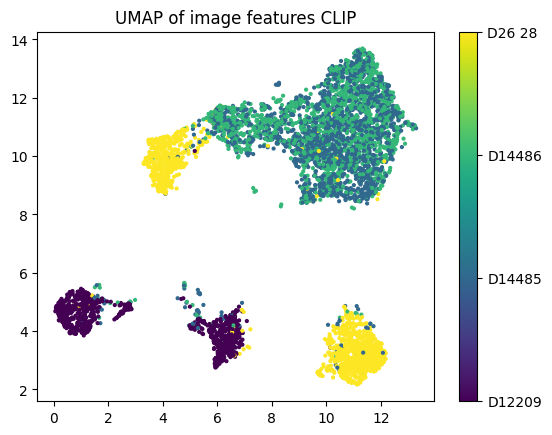

In [22]:
df['class'] = df['class'].astype('category')

# Check if all categories are present
print("Unique categories in 'class':", df['class'].cat.categories)

# Map categorical labels to codes
codes = df['class'].cat.codes

# Create scatter plot
scatter = plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=codes, cmap='viridis', s=4)

# Create a colorbar with original class labels
colorbar = plt.colorbar(scatter)
colorbar.set_ticks(np.arange(len(df['class'].cat.categories)))
colorbar.set_ticklabels(df['class'].cat.categories)
plt.title('UMAP of image features CLIP')
plt.show()

Unique categories in 'class': Index(['D12209', 'D14485', 'D14486', 'D26 28'], dtype='object')


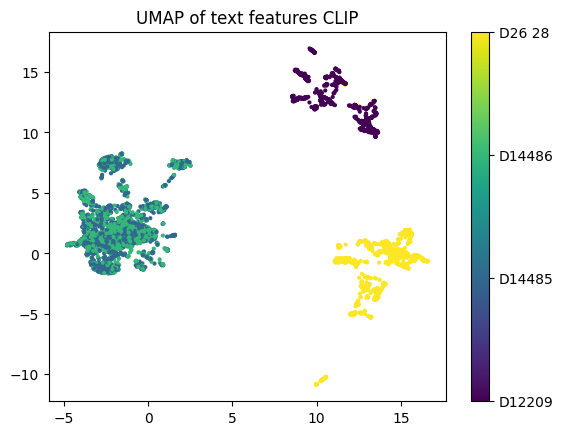

In [23]:
df['class'] = df['class'].astype('category')

# Check if all categories are present
print("Unique categories in 'class':", df['class'].cat.categories)

# Map categorical labels to codes
codes = df['class'].cat.codes

# Create scatter plot
scatter = plt.scatter(standard_embedding2[:, 0], standard_embedding2[:, 1], c=codes, cmap='viridis', s=4)

# Create a colorbar with original class labels
colorbar = plt.colorbar(scatter)
colorbar.set_ticks(np.arange(len(df['class'].cat.categories)))
colorbar.set_ticklabels(df['class'].cat.categories)
plt.title('UMAP of text features CLIP')
plt.show()